In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import opendatasets as od

In [2]:
od.download("https://www.kaggle.com/datasets/prathamtripathi/drug-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  sumitk87549


Your Kaggle Key:

  ········


100%|██████████| 1.68k/1.68k [00:00<00:00, 483kB/s]

In [3]:
drugs = pd.read_csv("drug-classification/drug200.csv", encoding = "ISO-8859-1")

In [4]:
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [6]:
drugs.shape

(200, 6)

In [7]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
drugs.Sex = encoder.fit_transform(drugs.Sex)
drugs.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,HIGH,25.355,DrugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,DrugY


In [11]:
drugs.BP = encoder.fit_transform(drugs.BP)
drugs.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [15]:
npdrugs = drugs.drop(columns=['Drug'], inplace=False).values
npdrugs[0:7]

array([[23, 0, 0, 'HIGH', 25.355],
       [47, 1, 1, 'HIGH', 13.093],
       [47, 1, 1, 'HIGH', 10.114],
       [28, 0, 2, 'HIGH', 7.798],
       [61, 0, 1, 'HIGH', 18.043],
       [22, 0, 2, 'HIGH', 8.607],
       [49, 0, 2, 'HIGH', 16.275]], dtype=object)

In [16]:
#encoding after converting to numpy
npdrugs[:,3] = encoder.fit(['HIGH','NORMAL']).transform(npdrugs[:,3])
npdrugs[0:7]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275]], dtype=object)

In [17]:
Y = drugs.Drug
Y.head()

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(npdrugs, Y, test_size=0.2, random_state=69)



In [19]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

In [20]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [21]:
pred = dtree.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
print("Accuracy Score of Decision Tree on Training Set:", accuracy_score(y_train, dtree.predict(x_train)))
print("Accuracy Score of Decision Tree on Testing Set:",accuracy_score(y_test, pred))

Accuracy Score of Decision Tree on Training Set: 1.0
Accuracy Score of Decision Tree on Testing Set: 0.975


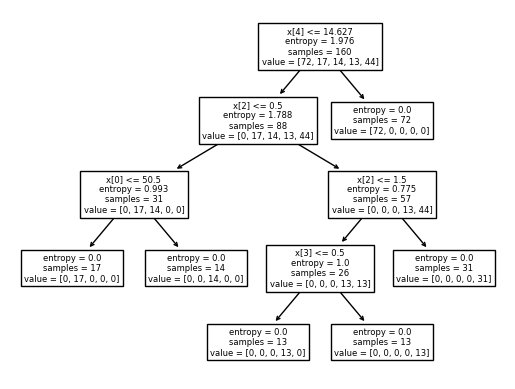

In [23]:
tree.plot_tree(dtree)
plt.show()